In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,rotation_range=180,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")
x_train=train_datagen.flow_from_directory('/content/gdrive/My Drive/Dataset/train_set',target_size=(128,128),batch_size=32,class_mode='binary')

Mounted at /content/gdrive
Found 436 images belonging to 2 classes.


In [ ]:
x_test=test_datagen.flow_from_directory('/content/gdrive/My Drive/Dataset/test_set',target_size=(128,128),batch_size=32,class_mode='binary')

Found 121 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
print(tf.version.VERSION)

2.9.2


In [47]:
model=Sequential()

In [48]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))

In [49]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [50]:
model.add(Flatten())

In [51]:
model.add(Dense(150,activation='relu'))

In [52]:
model.add(Dense(1,activation='sigmoid'))

In [53]:
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy"])

In [54]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 127008)            0         
                                                                 
 dense_2 (Dense)             (None, 150)               19051350  
                                                                 
 dense_3 (Dense)             (None, 1)                 151       
                                                                 
Total params: 19,052,397
Trainable params: 19,052,397
Non-trainable params: 0
__________________________________________

In [55]:
y=model.fit_generator(x_train,steps_per_epoch=14,epochs=10,validation_data=x_test,validation_steps=4)

Epoch 1/10
14/14 [==============================] - 29s 2s/step - loss: 3.4180 - accuracy: 0.6881 - val_loss: 0.4265 - val_accuracy: 0.8512
Epoch 2/10
14/14 [==============================] - 26s 2s/step - loss: 0.4201 - accuracy: 0.8073 - val_loss: 0.1752 - val_accuracy: 0.9174
Epoch 3/10
14/14 [==============================] - 27s 2s/step - loss: 0.2767 - accuracy: 0.8647 - val_loss: 0.1045 - val_accuracy: 0.9504
Epoch 4/10
14/14 [==============================] - 28s 2s/step - loss: 0.1947 - accuracy: 0.9128 - val_loss: 0.0723 - val_accuracy: 0.9752
Epoch 5/10
14/14 [==============================] - 26s 2s/step - loss: 0.1690 - accuracy: 0.9335 - val_loss: 0.0648 - val_accuracy: 0.9752
Epoch 6/10
14/14 [==============================] - 26s 2s/step - loss: 0.1878 - accuracy: 0.9174 - val_loss: 0.0528 - val_accuracy: 0.9917
Epoch 7/10
14/14 [==============================] - 26s 2s/step - loss: 0.1932 - accuracy: 0.9266 - val_loss: 0.0710 - val_accuracy: 0.9669
Epoch 8/10
14/14 [==

In [ ]:
model.save("forests.h5")

In [ ]:
import tensorflow as tf
tf.keras.models.save_model(model,'forest_fire.hdf5')

In [ ]:
import joblib
joblib.dump(model,'fhs_rf_model.pkl')

['fhs_rf_model.pkl']

In [ ]:
pip install twilio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 5.0 MB/s 


In [ ]:
pip install playsound

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7035 sha256=72bfde188f0934c6a96bbd5ede14cab20fce6665e4792c86ac2030aa3c012871
  Stored in directory: /root/.cache/pip/wheels/ba/f8/bb/ea57c0146b664dca3a0ada4199b0ecb5f9dfcb7b7e22b65ba2
Successfully built playsound


In [ ]:
pip install pygobject

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras.models import load_model
import cv2
import numpy as np
from PIL import Image
from keras.utils import img_to_array
import matplotlib.pyplot as plt
from twilio.rest import Client
from playsound import playsound
model = load_model('forests.h5')
account_sid='AC33e4f23328753859047817ac8815083b'
auth_token ='778340e32fc81ce5fc2f1061ad1791f9'
client=Client(account_sid,auth_token)
def prediction(img_path):
    i = cv2.imread(img_path)
    i = cv2.cvtColor(i, cv2.COLOR_BGR2RGB)
    img = Image.open(img_path)
    img = img.resize((128,128))
    x = img_to_array(img)
    x = np.expand_dims(x,axis=0)
    pred = model.predict(x)
    plt.imshow(i)
    if(pred==[[1.]]) :
      message=client.messages \
      .create(
          body='FOREST FIRE IS DECTECTED IN AREA,stay alert',
          #use twilio free number
          from_='+12535288281',
          #to number
          to='+918610505460')
      print(message.sid)
      print('Fire Detected')
      print('SMS sent!')
    else:
      print("NO FOREST FIRE DETECTED")
      print("no message sent")

1/1 [==============================] - 0s 77ms/step
NO FOREST FIRE DETECTED
no message sent


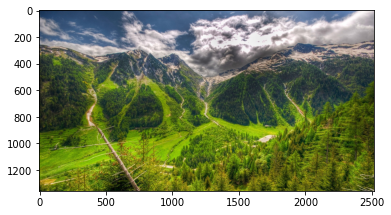

In [ ]:
prediction(r'/content/gdrive/My Drive/Dataset/test_set/forest/146019.jpg')

1/1 [==============================] - 0s 26ms/step
NO FOREST FIRE DETECTED
no message sent


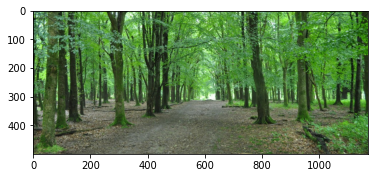

In [ ]:
prediction(r'/content/gdrive/My Drive/Dataset/test_set/forest/1170x500_Ireland_web.jpg')

1/1 [==============================] - 0s 27ms/step
NO FOREST FIRE DETECTED
no message sent


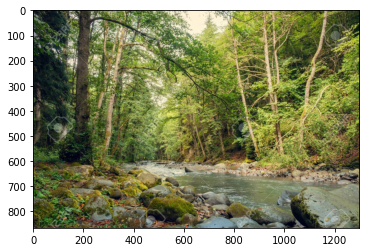

In [ ]:
prediction(r'/content/gdrive/My Drive/Dataset/test_set/forest/111188170_river_in_the_mountain_forest.jpg')

1/1 [==============================] - 0s 69ms/step
SMfa99f4c2eb49edd31a19f309c9412bf3
Fire Detected
SMS sent!


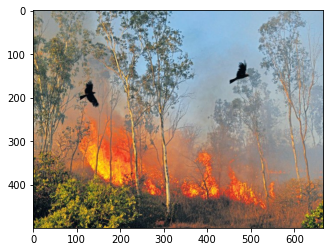

In [ ]:
prediction(r'/content/gdrive/My Drive/Dataset/test_set/with fire/599857.jpg')

1/1 [==============================] - 0s 23ms/step
SM8b5f3abaec776caff09c1281ed2509ac
Fire Detected
SMS sent!


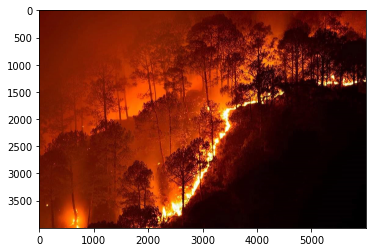

In [ ]:
prediction(r'/content/gdrive/My Drive/Dataset/test_set/with fire/Bandipur_fires_2019.jpg')

1/1 [==============================] - 0s 23ms/step
SM463c0709fe5576a54f005328f59d4cc1
Fire Detected
SMS sent!


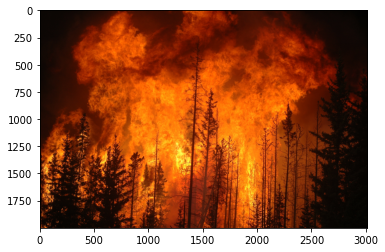

In [ ]:
prediction(r'/content/gdrive/My Drive/Dataset/test_set/with fire/X80IR0GYSsG6RaiLcsXX.jpg')

In [56]:
print(np.average(y.history['accuracy']))

0.8807339489459991


In [57]:
print(np.average(y.history['val_accuracy']))

0.9545454502105712


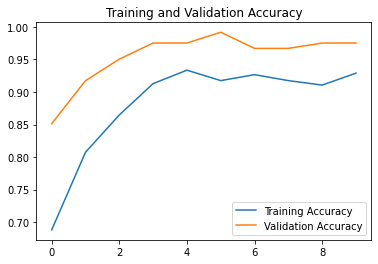

In [58]:
epochs = range(0,10)
plt.plot(epochs, y.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, y.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()